# TASK - 4

## Exploratory Data Analysis

### Importing libraries

In [312]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 15)
pd.set_option('display.width', 1000)

### Importing Data

In [313]:
data=pd.read_csv('C:/Users/Shrut-Shah/Downloads/SampleSuperstore.csv')
print(data.shape)

(9994, 13)


### Checking columns,data types and missing values 

In [314]:
print(data.columns)

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount', 'Profit'], dtype='object')


In [315]:
print(data.dtypes)

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object


In [316]:
print(data.describe())

        Postal Code         Sales     Quantity     Discount       Profit
count   9994.000000   9994.000000  9994.000000  9994.000000  9994.000000
mean   55190.379428    229.858001     3.789574     0.156203    28.656896
std    32063.693350    623.245101     2.225110     0.206452   234.260108
min     1040.000000      0.444000     1.000000     0.000000 -6599.978000
25%    23223.000000     17.280000     2.000000     0.000000     1.728750
50%    56430.500000     54.490000     3.000000     0.200000     8.666500
75%    90008.000000    209.940000     5.000000     0.200000    29.364000
max    99301.000000  22638.480000    14.000000     0.800000  8399.976000


In [317]:
print(data.isnull().sum())

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64


In [318]:
print(data.nunique())

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64


In [319]:
print(data[['City','State','Category','Postal Code','Sales','Quantity','Discount','Profit']].head())

              City       State         Category  Postal Code     Sales  Quantity  Discount    Profit
0        Henderson    Kentucky        Furniture        42420  261.9600         2      0.00   41.9136
1        Henderson    Kentucky        Furniture        42420  731.9400         3      0.00  219.5820
2      Los Angeles  California  Office Supplies        90036   14.6200         2      0.00    6.8714
3  Fort Lauderdale     Florida        Furniture        33311  957.5775         5      0.45 -383.0310
4  Fort Lauderdale     Florida  Office Supplies        33311   22.3680         2      0.20    2.5164


In [320]:
print('Net profit: ',data['Profit'].values.sum())

Net profit:  286397.0217


In [321]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB
None


### Correlation between Sales,Quantity,Discount,Profit

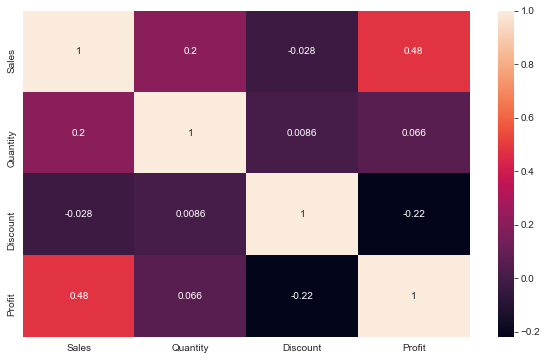

In [322]:
corelation=data[['Sales','Quantity','Discount','Profit']].corr()
sns.heatmap(corelation,xticklabels=corelation.columns,yticklabels=corelation.columns,annot=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000266A7BF8E48>,
      dtype=object)

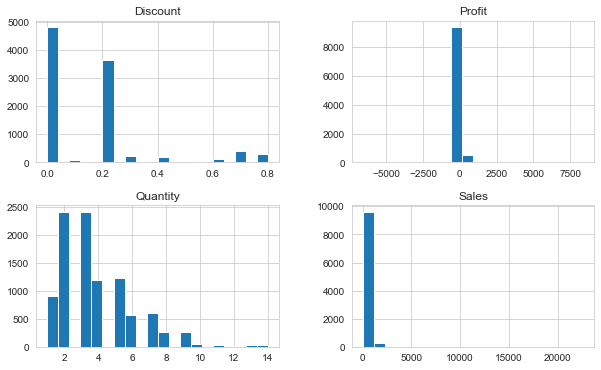

In [323]:
df=data[['Profit','Sales','Discount','Quantity']]
df.hist(bins=20)

### Graph of Sales,Profit and Discount

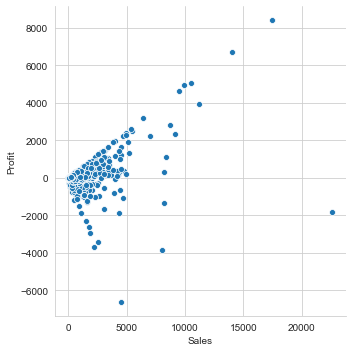

In [324]:
sns.relplot(x='Sales',y='Profit',data=data)

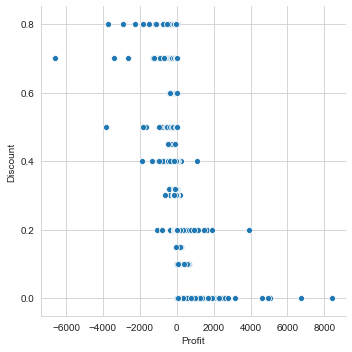

In [325]:
sns.relplot(x='Profit',y='Discount',data=data)

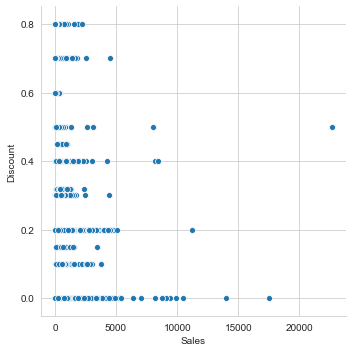

In [326]:
sns.relplot(x='Sales',y='Discount',data=data)

### Bar Graph of State vs Profit

States where there is NO profit are: 
  ['Arizona', 'Colorado', 'Florida', 'Illinois', 'North Carolina', 'Ohio', 'Oregon', 'Pennsylvania', 'Tennessee', 'Texas']


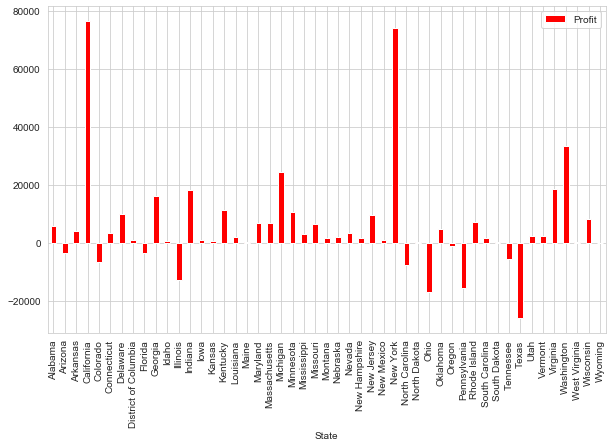

In [327]:
df=data[['State','Profit']]
df=df.set_index('State')
df=df.groupby(level=0).sum()
df=df.reset_index()
df.plot.bar(x='State',y='Profit',color='red',width=0.5)
xc=df[df['Profit']<0]
print('States where there is NO profit are: \n ',list(xc['State']))

### Bar Graph of State vs Sales

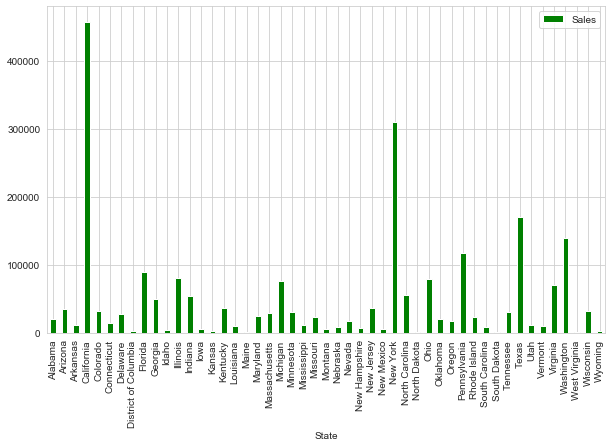

In [328]:
df=data[['State','Sales']]
df=df.set_index('State')
df=df.groupby(level=0).sum()
df=df.reset_index()
df.plot.bar(x='State',y='Sales',color='green')

### Pie chart  

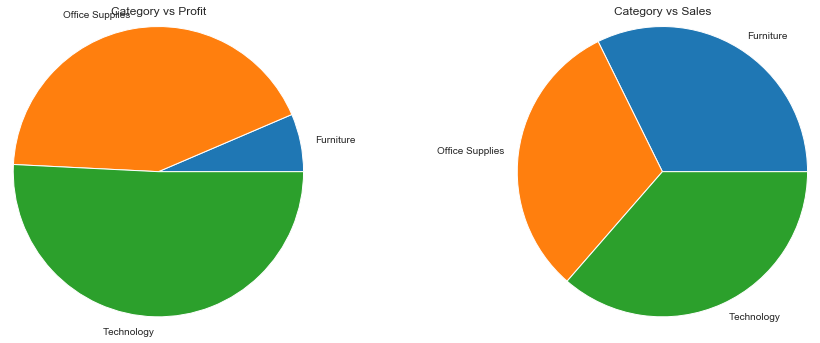

In [329]:
df=data[['Category','Profit','Sales']]
df=df.set_index('Category')
df=df.groupby(level=0).sum()
prof=list(df['Profit'])
sale=list(df['Sales'])
ind=df.index.values.tolist()

fig = plt.figure()

ax1 = fig.add_axes([0, 0, .5, 0.7], aspect=1)
ax1.pie(prof, labels=ind, radius = 1.2)
ax2 = fig.add_axes([.7, .0, .5, .7], aspect=1)
ax2.pie(sale, labels=ind, radius = 1.2)
ax1.set_title('Category vs Profit')
ax2.set_title('Category vs Sales')
plt.show()


### Bar graph of Ship Mode vs Sales

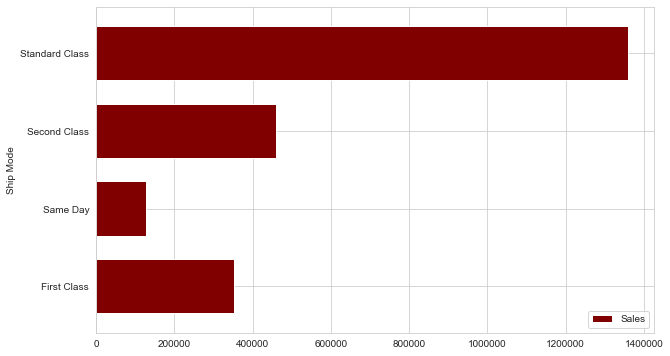

In [330]:
df=data[['Ship Mode','Sales']]
df=df.set_index('Ship Mode')
df=df.groupby(level=0).sum()
df=df.reset_index()
df.plot.barh(x='Ship Mode',y='Sales',color='maroon',width=0.7)


### Pie chart

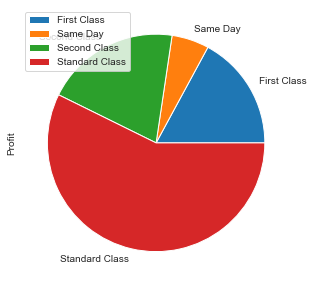

In [331]:
# Ship mode vs Profit


df=data[['Ship Mode','Profit']]
df=df.set_index('Ship Mode')
df=df.groupby(level=0).sum()
df.plot.pie(y='Profit',figsize=(5,5))